#1 MUSHROOMS: El siguiente dataset está relacionado al consumo de diferentes tipos de hongos. El dataset cuenta con un detalle de características por cada tipo de hongo y su clasificación como comestible, venenoso o en sin confirmar, pero se los consideran igual que los venenosos.

La potencialidad del dataset consiste en poder determinar de la mejor manera nuevos hongos que puedan ser consumidos en el futuro.

Como se ve más abajo cuenta con 23 columnas y 8124 filas. No hay valores nulos.

Agrego el glosario para un mejor entendimiento de las variables y atributos de cada una:

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d




In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer


df = pd.read_csv("mushrooms.csv")
#df.head()
#df.shape
#df.info()
#df.columns
df['class'].unique()


for column in df.columns:
  print(column, df[column].unique())

df.head(5).round(1)

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


columna = 'class'
class = [comestibles, venenosos]
fig,ax = plt.subplots(figsize =(10, 7))
ax.pie(class, labels = cars,)

# Sesgo del listado

Con el gráfico a continuación vamos a analilzar la variable principal (columna Class), ya que la intención del dataset es poder indicar según determinadas características si un hongo es o no venenoso.

e    4208
p    3916
Name: class, dtype: int64

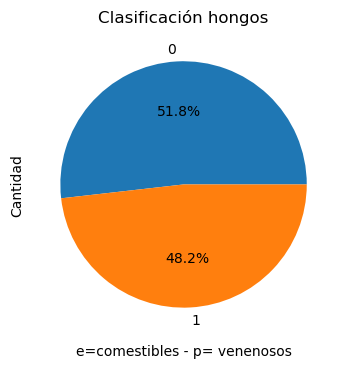

In [4]:
fig, ax = plt.subplots(figsize=(4, 4))
df['class'].value_counts().plot(kind="pie", fontsize = 10, labels = df.index,autopct='%1.1f%%' )
ax.set_title('Clasificación hongos')
ax.set_xlabel('e=comestibles - p= venenosos')
ax.set_ylabel('Cantidad')
df['class'].value_counts()

Como se puede observar el dataset no está sesgado, ya que prácticamente hay la misma cantidad de hongos comestibles como de hongos venenosos.

# Búsqueda de características únicas.

En el gráfico más abajo y habiendo revisado el dataset, la intención es cerciorarnos que la característica de "Veil-type" está presente en los hongos comestibles y no comestibles, sin existir otra característica adicional.

Text(0, 0.5, 'Cantidad')

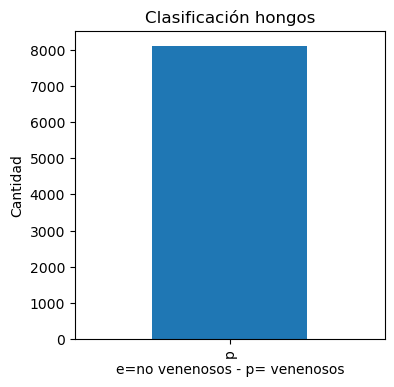

In [5]:
fig, ax = plt.subplots(figsize=(4, 4))
df['veil-type'].value_counts().plot(kind="bar", fontsize = 10, )
ax.set_title('Clasificación hongos')
ax.set_xlabel('e=no venenosos - p= venenosos')
ax.set_ylabel('Cantidad')

Con este gráfico podemos demostrar que la columna Veil-type se puede omitir más adelante en el análisis y armado del algoritmo, ya que no aporta al análisis para saber si un hongo puede o no ser comestible.

# Comparativa de distintas características en relación a la variable principal
Más abajo generamos dos subgrupos, uno relacionado a hongos comestibles y otro relacionado a hongos venenosos.
La idea es poder analizar las demás características y ver si alguna prevalece sobre otra en relación a la variable principal.

In [14]:
comestibles=df[df["class"]=="e"]
venenosos=df[df["class"]=="p"]
x = comestibles["bruises"]
y = venenosos["bruises"]
g= [x,y]
w= y.value_counts()
print(comestibles)
print (venenosos)
print (x)
print (y)
print(g)
w

     class cap-shape cap-surface cap-color bruises odor gill-attachment  \
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
4        e         x           s         g       f    n               f   
5        e         x           y         y       t    a               f   
6        e         b           s         w       t    a               f   
...    ...       ...         ...       ...     ...  ...             ...   
8115     e         x           s         n       f    n               a   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
1               c         b

f    3292
t     624
Name: bruises, dtype: int64

Text(0, 0.5, 'Cantidad')

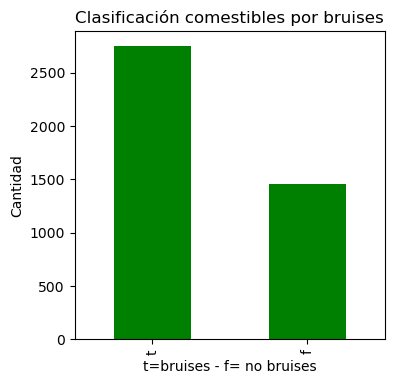

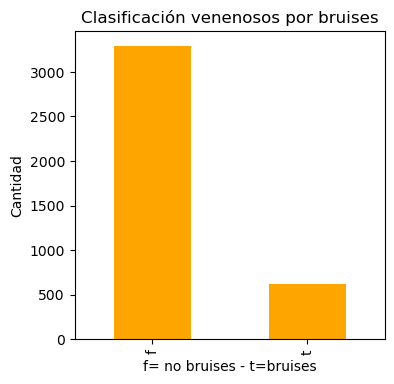

In [15]:
fig, ax = plt.subplots(figsize=(4, 4))
plot1=x.value_counts().plot(kind="bar", fontsize = 10, color="green" )
ax.set_title('Clasificación comestibles por bruises')
ax.set_xlabel('t=bruises - f= no bruises')
ax.set_ylabel('Cantidad')
fig, ax1 = plt.subplots(figsize=(4, 4))
plot2=y.value_counts().plot(kind="bar", fontsize = 10, color="orange")
ax1.set_title('Clasificación venenosos por bruises')
ax1.set_xlabel('f= no bruises - t=bruises')
ax1.set_ylabel('Cantidad')


En relación a los Bruises (o moretones) podemos observar que la presencia de bruises es mayor en hongos comestibles. Con lo cual, su ausencia es un fuerte indicador de que sea venenoso.

# Reemplazo de valores ?
Revisando el dataset he observado que la columna stalk-root tiene valores ?
Se tomo la determinación de reemplazarlo por el valor que más se repite.

In [11]:
df['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [36]:
data = df.replace("?", np.nan)
data.loc[:,"stalk-root"]
imputer = SimpleImputer(missing_values=np.NaN,strategy ="most_frequent")
data['stalk-root']=imputer.fit_transform(data['stalk-root'].values.reshape(-1, 1))
data.loc[:,"stalk-root"]

0       e
1       c
2       c
3       e
4       e
       ..
8119    b
8120    b
8121    b
8122    b
8123    b
Name: stalk-root, Length: 8124, dtype: object

# Graficando con Seaborn
A continuación procedemos a realizar gráficos con seaborn para continuar con el análisis.

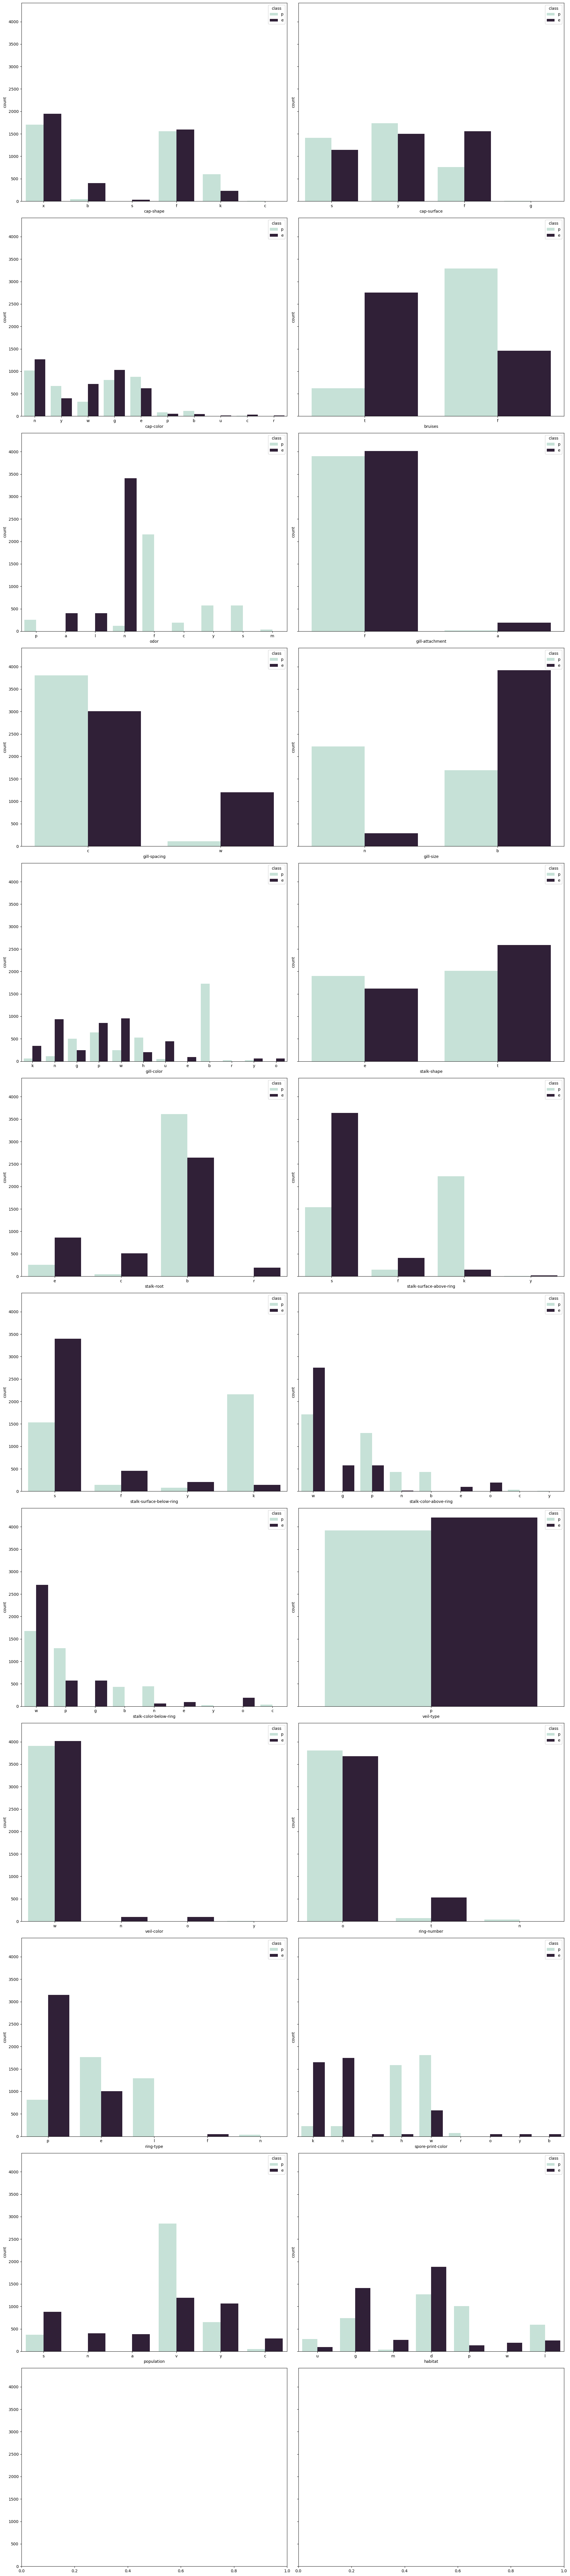

In [38]:
fig, axes = plt.subplots(nrows=12,ncols=2, figsize=(20,90),sharey=True)
idx = 0
for col in df.columns[1:]:
    sns.countplot(data=data,x=col, hue='class' ,ax=axes[idx//2][idx%2], palette='ch:s=.5,rot=-.5')
    idx += 1

    
plt.tight_layout()
plt.show()


Teniendo todos los gráficos donde relacionamos las características según si se encuentran en hongos venenosos o comestibles, podemos llegar a algunas de las siguientes conclusiones:

- Respecto a cap-shape, cap-surface, cap-color, girll-attachment, stalk-shape, ring-number, veil-color, stalk-root, veil-color, ring-number, population, habitat, es difícil encontrar una característica que destaque en la diferenciación de hongos venenosos y comestibles.
- Respecto a Bruises, si el hongo tiene bruises es más probable que sea comestible.
- Respecto al Odor, si no tiene olor es muy probable que sea comestible, lo mismo si tiene olor a almendra o anís. Mientras que si tiene un olor desagradable o a pescado o picante es venenoso.
- Respecto a gill-spacing, si están amontonadas es más probable que sean comestibles.
- Respecto a gill-color, si es color es beige son comestibles.
- Respecto a veil-type, puede ser omitida en el análisis posterior, ya que es una solo característica que se repite para los hongos venenosos y comestibles.
- Respecto a Stalk-surface-above-ring y a Stalk-surface-below-ring, si son sedosas es más probable que sean venenosos.
- Respecto a stalk-color-above-ring, si el color es gris, rojo o naranja, son comestibles.
- Respecto a stalk-color-below-ring, si son beige o marrón, son venenosos.
- Respecto a ring-type, si son largos son venenosos.
- Respecto a spore-print-color, si son blancos o color chocolate es más probable que sean venenosos, mientras que si son negros o marrones son comestibles.